In [1]:
using EnvelopeApproximation
using EnvelopeApproximation.BubbleBasics
using EnvelopeApproximation.BubblesIntegration
using EnvelopeApproximation.BubblesEvolution
using EnvelopeApproximation.StressEnergyTensor
import LinearAlgebra: norm
import Meshes: coordinates
using Plots

Point3 = EnvelopeApproximation.Point3


Point3 (alias for Meshes.Point{3, Float64})

# Setting up the bubbles

In [2]:
R = 2.
d = 2.4
nucleations = [(time=0., site=Point3(0., 0., -d / 2)), (time=0., site=Point3(0., 0., d / 2))]
snapshot = BubblesSnapShot(nucleations, R)

BubblesSnapShot(@NamedTuple{time::Float64, site::Meshes.Point3}[(time = 0.0, site = Point(0.0, 0.0, -1.2)), (time = 0.0, site = Point(0.0, 0.0, 1.2))], 2.0, EnvelopeApproximation.BubblesEvolution.speed_of_light_profile)

# Setting up the Ks

In [3]:
k_0 = 2π / (R + d / 2)
ks = LinRange(k_0 / 10, k_0 * 10, 1000)
k_vecs = (x -> Point3(0., 0., x)).(ks)
norm(p:: Point3) = norm(coordinates(p), 2)

norm (generic function with 23 methods)

In [4]:
k_0

1.9634954084936207

In [5]:
ks

1000-element LinRange{Float64, Int64}:
 0.19635, 0.215808, 0.235266, 0.254724, …, 19.5766, 19.596, 19.6155, 19.635

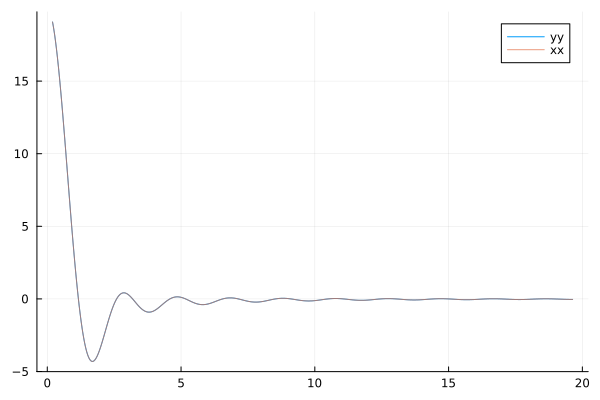

In [22]:
plot(ks, numeric_yy_integral, label="yy")
plot!(ks, numeric_xx_integral, label="xx", alpha=0.7)

# numerical computation

In [7]:
import EnvelopeApproximation.GravitationalPotentials: ψ as _ψ
ψ = _ψ(k_vecs, snapshot, [R], 50, 50; rtol=1e-2)